# Compare profit efore and after LSTM model predictions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_trading = pd.read_csv('data/processed_price_turning_BTCUSDT.csv')

# Convert 'entry_date' to datetime
df_trading['entry_date'] = pd.to_datetime(df_trading['entry_date'])

## Filter Data After June 30, 2023

In [2]:
# Define the date to filter
filter_date = pd.to_datetime('2023-06-30')

# Filter the DataFrame
df_trading = df_trading[df_trading['entry_date'] > filter_date]

df_trading

,entry_date,entry_price,exit_date,exit_price,PnL,Balance,Cum_PnL
3450,2023-06-30 05:30:00,30778.5,2023-06-30 11:30:00,30823.4,-44.90,547086.17,447086.17
3451,2023-06-30 11:45:00,30897.7,2023-06-30 13:15:00,31048.8,151.10,547237.27,447237.27
3452,2023-06-30 13:30:00,30295.5,2023-06-30 13:30:00,30295.5,-550.82,546686.45,446686.45
3453,2023-06-30 14:00:00,30269.1,2023-06-30 23:45:00,30460.2,191.10,546877.55,446877.55
3454,2023-07-01 00:00:00,30438.6,2023-07-01 07:30:00,30424.5,14.10,546891.65,446891.65
...,...,...,...,...,...,...,...
4825,2024-06-08 07:15:00,69525.6,2024-06-08 12:15:00,69391.6,-134.00,711884.14,611884.14
4826,2024-06-08 12:30:00,69342.3,2024-06-08 14:30:00,69430.9,-88.60,711795.54,611795.54
4827,2024-06-08 14:45:00,69499.9,2024-06-08 22:00:00,69425.5,-74.40,711721.14,611721.14
4828,2024-06-08 22:15:00,69331.0,2024-06-09 04:00:00,69299.7,31.30,711752.44,611752.44


## Calculate Total PbL and Win Rate

In [3]:
# Calculate total profit
total_profit = df_trading['PnL'].sum()

# Calculate win rate
win_rate = (df_trading['PnL'] > 0).mean()

print(f"\nTotal PnL: {total_profit}")
print(f"Win Rate: {win_rate:.2%}")


Total PnL: 164621.37
Win Rate: 46.45%


## Visualize Profit Growth

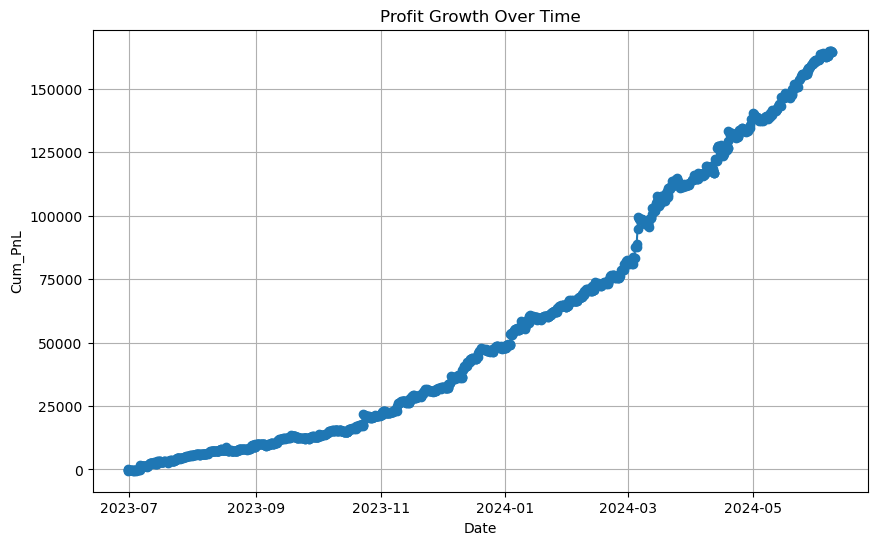

In [4]:
# Calculate cumulative profit
df_trading['Cum_PnL'] = df_trading['PnL'].cumsum()

# Plot cumulative profit
plt.figure(figsize=(10, 6))
plt.plot(df_trading['entry_date'], df_trading['Cum_PnL'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Cum_PnL')
plt.title('Profit Growth Over Time')
plt.grid(True)
plt.show()


## Calculate PnL with predictions

In [5]:
df_result = pd.read_csv('data/testing_results.csv')

df_result['time'] = pd.to_datetime(df_result['time'])

df_result

,time,prediction
0,2023-06-30 00:15:00,0.0
1,2023-06-30 00:30:00,0.0
2,2023-06-30 00:45:00,0.0
3,2023-06-30 01:00:00,0.0
4,2023-06-30 01:15:00,0.0
...,...,...
31191,2024-06-08 22:45:00,1.0
31192,2024-06-08 23:00:00,1.0
31193,2024-06-08 23:15:00,1.0
31194,2024-06-08 23:30:00,1.0


In [6]:
# Merge the DataFrames on the date columns
df = pd.merge(df_trading, df_result, left_on='entry_date', right_on='time', how='left')

df

,entry_date,entry_price,exit_date,exit_price,PnL,Balance,Cum_PnL,time,prediction
0,2023-06-30 05:30:00,30778.5,2023-06-30 11:30:00,30823.4,-44.90,547086.17,-44.90,2023-06-30 05:30:00,1.0
1,2023-06-30 11:45:00,30897.7,2023-06-30 13:15:00,31048.8,151.10,547237.27,106.20,2023-06-30 11:45:00,0.0
2,2023-06-30 13:30:00,30295.5,2023-06-30 13:30:00,30295.5,-550.82,546686.45,-444.62,NaT,NaN
3,2023-06-30 14:00:00,30269.1,2023-06-30 23:45:00,30460.2,191.10,546877.55,-253.52,2023-06-30 14:00:00,1.0
4,2023-07-01 00:00:00,30438.6,2023-07-01 07:30:00,30424.5,14.10,546891.65,-239.42,2023-07-01 00:00:00,1.0
...,...,...,...,...,...,...,...,...,...
1375,2024-06-08 07:15:00,69525.6,2024-06-08 12:15:00,69391.6,-134.00,711884.14,164753.07,2024-06-08 07:15:00,0.0
1376,2024-06-08 12:30:00,69342.3,2024-06-08 14:30:00,69430.9,-88.60,711795.54,164664.47,2024-06-08 12:30:00,1.0
1377,2024-06-08 14:45:00,69499.9,2024-06-08 22:00:00,69425.5,-74.40,711721.14,164590.07,2024-06-08 14:45:00,0.0
1378,2024-06-08 22:15:00,69331.0,2024-06-09 04:00:00,69299.7,31.30,711752.44,164621.37,2024-06-08 22:15:00,1.0


In [7]:
# Count occurrences of the value 1 in the 'prediction' column
count_value_1 = (df['prediction'] == 1).sum()
print(count_value_1)

757


In [8]:
# Filter the DataFrame to include only rows where prediction == 1
df = df[df['prediction'] == 1]

df

,entry_date,entry_price,exit_date,exit_price,PnL,Balance,Cum_PnL,time,prediction
0,2023-06-30 05:30:00,30778.5,2023-06-30 11:30:00,30823.4,-44.90,547086.17,-44.90,2023-06-30 05:30:00,1.0
3,2023-06-30 14:00:00,30269.1,2023-06-30 23:45:00,30460.2,191.10,546877.55,-253.52,2023-06-30 14:00:00,1.0
4,2023-07-01 00:00:00,30438.6,2023-07-01 07:30:00,30424.5,14.10,546891.65,-239.42,2023-07-01 00:00:00,1.0
8,2023-07-02 03:30:00,30513.0,2023-07-02 14:15:00,30524.3,-11.30,546920.90,-210.17,2023-07-02 03:30:00,1.0
9,2023-07-02 14:30:00,30607.5,2023-07-02 15:15:00,30467.8,-203.74,546717.16,-413.91,2023-07-02 14:30:00,1.0
...,...,...,...,...,...,...,...,...,...
1371,2024-06-06 20:45:00,70767.9,2024-06-07 12:30:00,71064.3,296.40,710172.54,163041.47,2024-06-06 20:45:00,1.0
1372,2024-06-07 12:45:00,71274.0,2024-06-07 20:45:00,69338.1,1935.90,712108.44,164977.37,2024-06-07 12:45:00,1.0
1373,2024-06-07 21:00:00,69391.4,2024-06-08 04:30:00,69382.6,-8.80,712099.64,164968.57,2024-06-07 21:00:00,1.0
1376,2024-06-08 12:30:00,69342.3,2024-06-08 14:30:00,69430.9,-88.60,711795.54,164664.47,2024-06-08 12:30:00,1.0


In [9]:
# Calculate total profit
total_profit = df['PnL'].sum()

# Calculate win rate
win_rate = (df['PnL'] > 0).mean()

print(f"\nTotal PnL: {total_profit}")
print(f"Win Rate: {win_rate:.2%}")


Total PnL: 100063.53
Win Rate: 45.84%


/var/folders/rc/by_5fr2d2ds3vzb0s0qcn32r0000gn/T/ipykernel_28286/3645230933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cum_PnL_1'] = df['PnL'].cumsum()


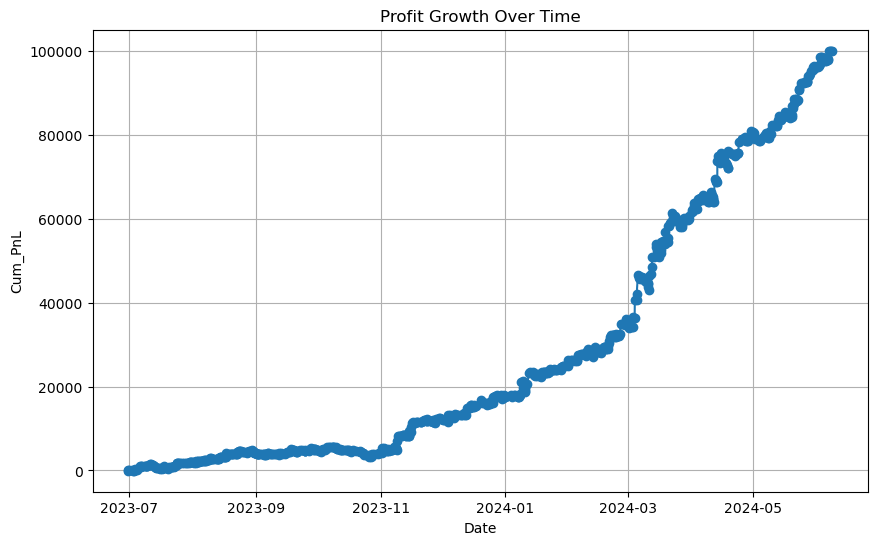

In [10]:
# Calculate cumulative profit
df['Cum_PnL_1'] = df['PnL'].cumsum()

# Plot cumulative profit
plt.figure(figsize=(10, 6))
plt.plot(df['entry_date'], df['Cum_PnL_1'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Cum_PnL')
plt.title('Profit Growth Over Time')
plt.grid(True)
plt.show()